# SVM
https://hleecaster.com/ml-svm-concept/    
수식 자료: https://angeloyeo.github.io/2020/09/30/SVM.html

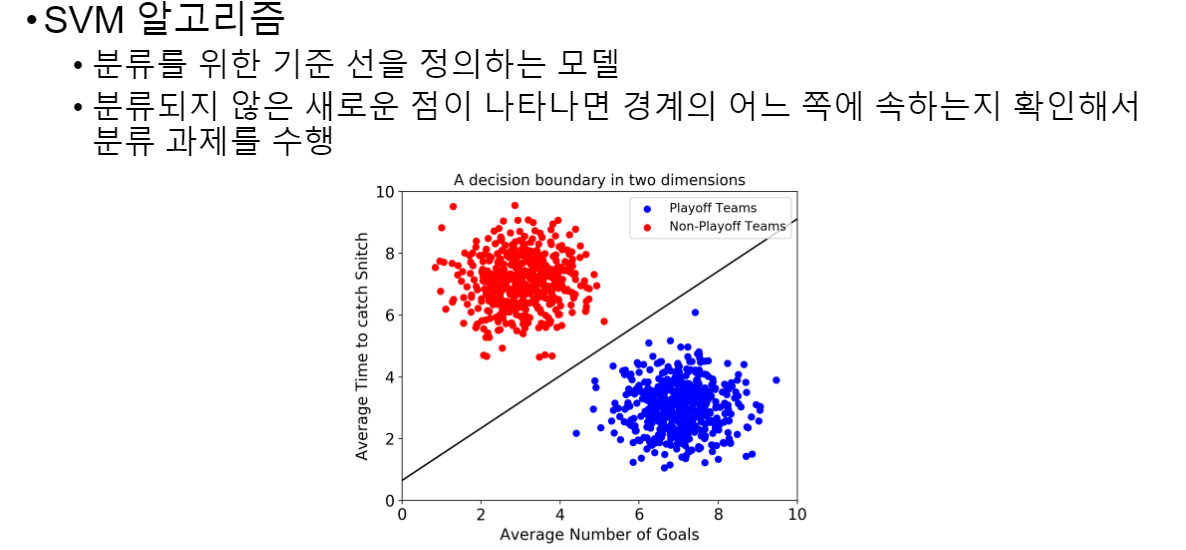

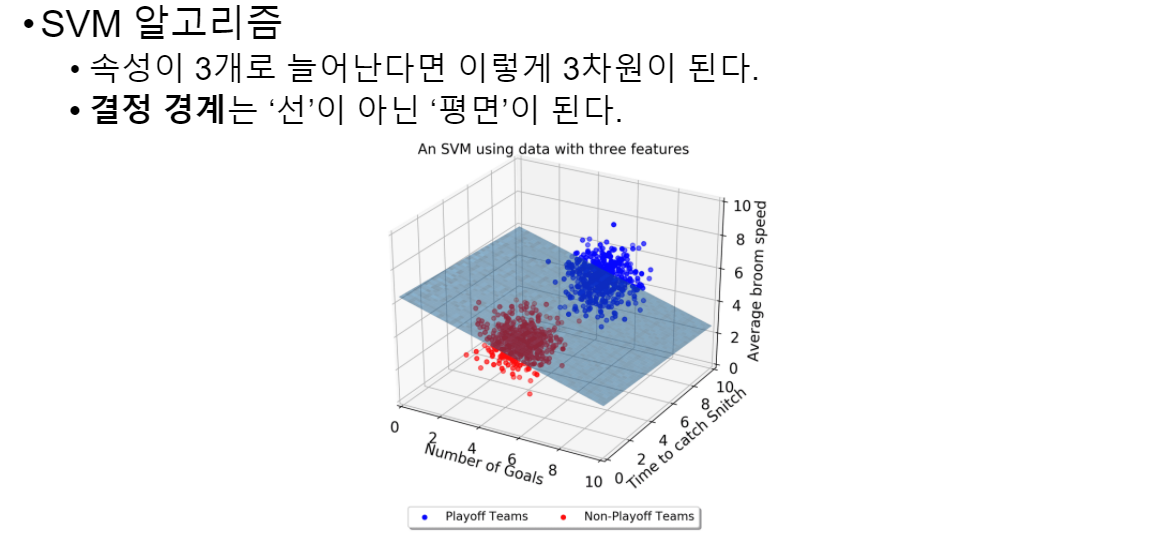

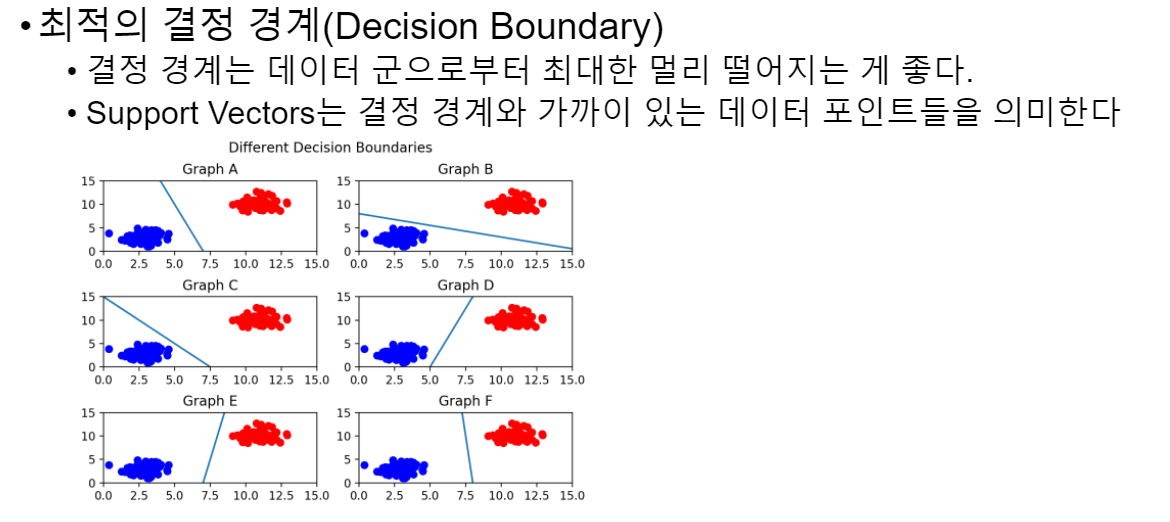

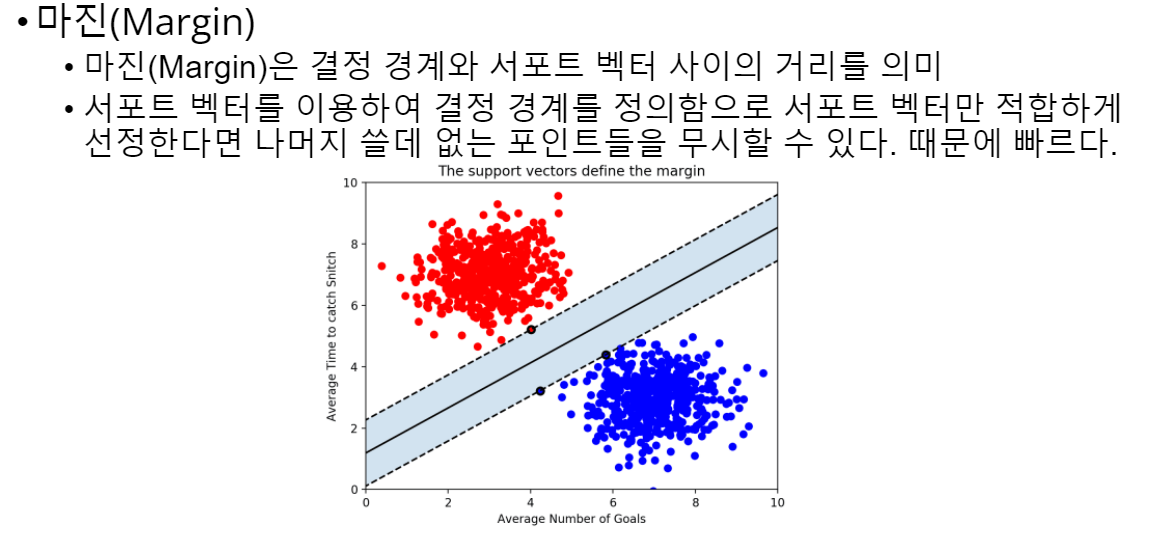

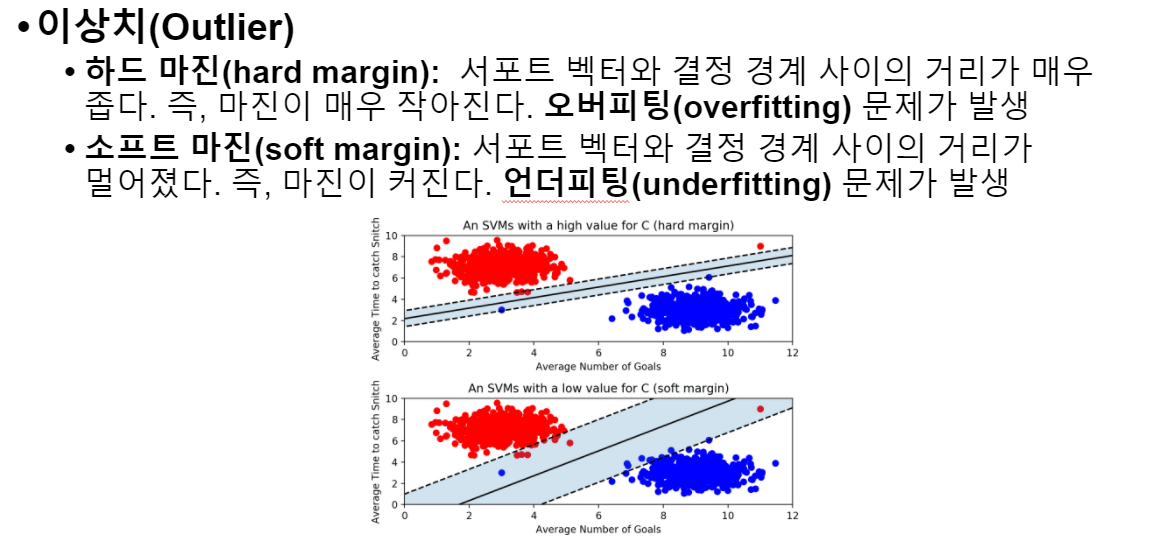

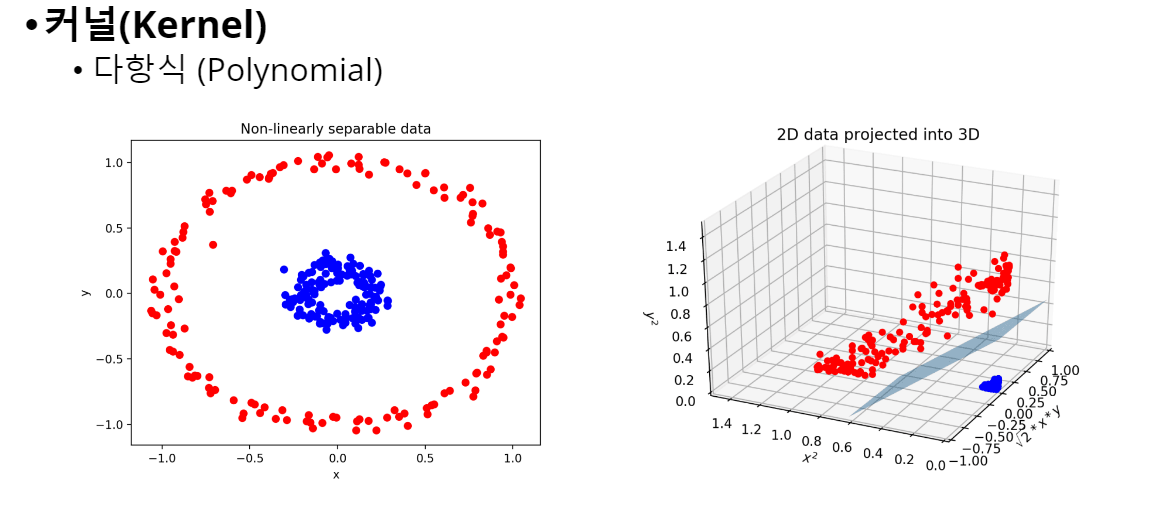

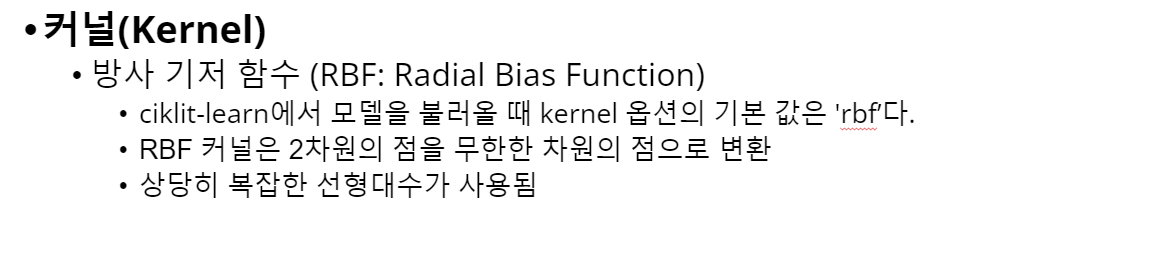

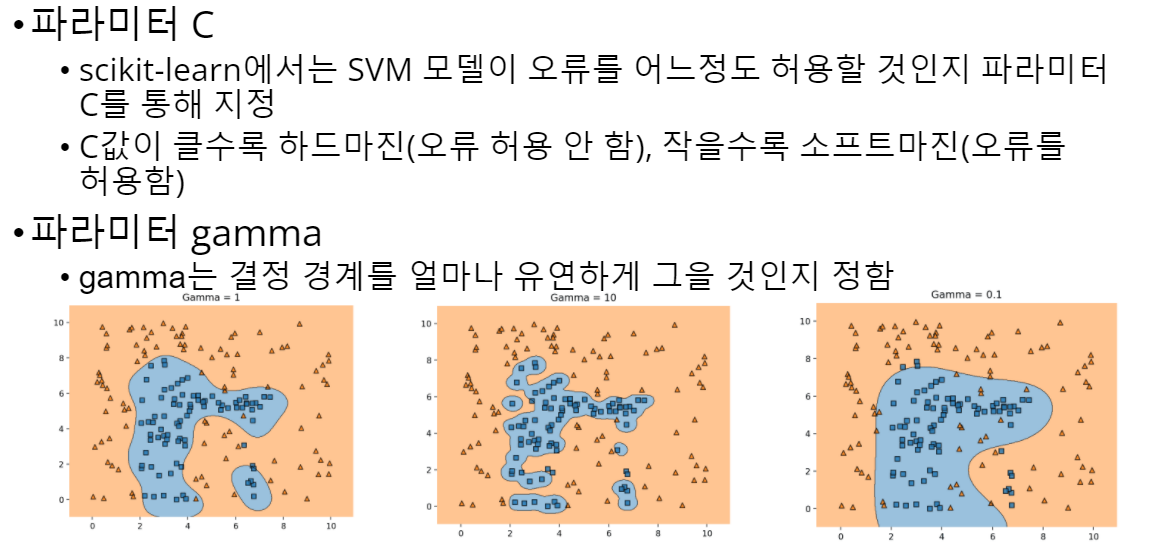

## [Step 1] 데이터 준비/ 기본 설정



In [1]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

## [Step 2] 데이터 탐색/ 전처리

In [3]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## [Step 3] 분석에 사용할 속성을 선택

In [4]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [5]:
# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

In [7]:
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


## [Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [9]:
# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


## [Step 5] SVM 분류 모형 - sklearn 사용

In [11]:
# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm
# from sklearn.svm import SVC
# 모형 객체 생성 (기본값 kernel='rbf' 적용)
svm_model = svm.SVC(C=2.0, gamma = 0.2)
# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train) 

SVC(C=2.0, gamma=0.2)

- C(cost) : 이론에서 배운 주요 파라미터로써 어느 정도의 오차를 허용할지에 대한 파라미터
- kernel : 어떤 커널함수를 사용할지에 대한 파라미터입니다. 'linear', 'sigmoid', 'rbf', 'poly'가 활용
- degree : 어느 차수까지의 다항차수로 분류를 할 지에 대한 파라미터입니다. 커널함수가 'poly' 일 때 사용
- gamma : 곡률 경계에 대한 파라미터입니다. 'rbf', 'poly', 'sigmoid'일 때 튜닝하는 값
- coef0 : 상수값으로써 'poly', 'sigmoid'일 때 사용

In [12]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

In [13]:
df = pd.DataFrame({'y_hat':y_hat,'y':y_test})
df['차이'] = df['y_hat'] == df['y']
df.head()

,y_hat,y,차이
728,0,0,True
555,0,0,True
426,1,1,True
278,0,0,True
617,0,0,True


In [14]:
print('오답 수:',len(df) - sum(df['차이']))

오답 수: 37


In [15]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat) 
svm_matrix

array([[120,   5],
       [ 32,  58]])

In [16]:
# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)  
print(svm_report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       125
           1       0.92      0.64      0.76        90

    accuracy                           0.83       215
   macro avg       0.86      0.80      0.81       215
weighted avg       0.84      0.83      0.82       215

